https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_SHY

In [3]:
X = data_SHY.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=80.658847, expected=80.461250
predicted=80.536668, expected=80.486794
predicted=80.518342, expected=80.648430
predicted=80.636495, expected=80.543831
predicted=80.590632, expected=80.695961
predicted=80.680845, expected=80.694084
predicted=80.709042, expected=80.665520
predicted=80.691338, expected=80.646515
predicted=80.674340, expected=80.713097
predicted=80.718928, expected=80.570435
predicted=80.630937, expected=80.606552
predicted=80.629761, expected=80.777817
predicted=80.756859, expected=80.701660
predicted=80.735609, expected=80.692177
predicted=80.717612, expected=80.739761
predicted=80.750341, expected=80.815948
predicted=80.814116, expected=80.796890
predicted=80.816986, expected=80.987297
predicted=80.951382, expected=80.920654
predicted=80.943721, expected=80.958755
predicted=80.963533, expected=80.930183
predicted=80.953686, expected=80.796837
predicted=80.856393, expected=80.539696
predicted=80.645550, expected=80.673897
predicted=80.691500, expected=80.597694


predicted=83.492844, expected=83.678604
predicted=83.658113, expected=83.758156
predicted=83.750594, expected=84.086311


In [9]:
error_SHY = math.sqrt(mean_squared_error(test, predictions))
%store error_SHY
print('Test RMSE: %.3f' % error_SHY)

Stored 'error_SHY' (float)
Test RMSE: 0.117


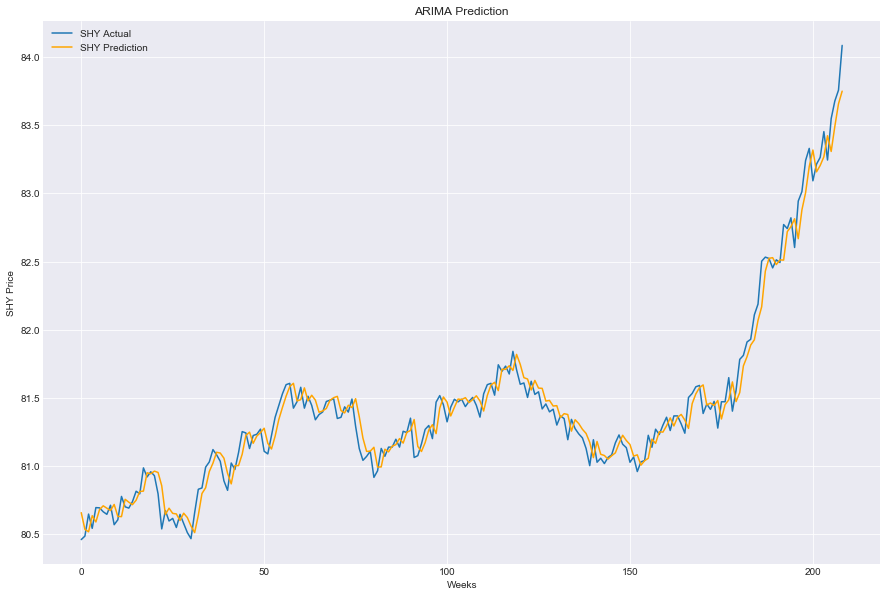

In [10]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'SHY Actual')
plt.plot(predictions, color='orange', label = 'SHY Prediction')
plt.xlabel('Weeks')
plt.ylabel('SHY Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_SHY = pd.DataFrame(predictions) 
ARIMA_pred_SHY.columns = ['ARIMA_pred_SHY']
%store ARIMA_pred_SHY

Stored 'ARIMA_pred_SHY' (DataFrame)
